In [766]:
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy as np
import pylab as plt
%matplotlib inline
import scipy.stats
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
import multiprocessing
import sys
sys.path.insert(0,'python')
from fastRWpkl import *
import numpy.ma as ma
from readSent import *
from collections import Counter
import cPickle as pkl
from scipy import optimize
from functools import partial
import scipy.ndimage as ndimage
import numpy as np
import scipy
from scipy import signal
import scipy.stats
import tifffile as tiff
import glob
from scipy.ndimage.morphology import binary_dilation as bd

In [2]:
fnames = ['Newoppb2_modis','Newoppb3_modis','Newoppb4_modis','Newoppb8_modis','Newoppb8a_modis','Newoppb11_modis','Newoppb12_modis']

In [3]:
paras = [parallel_rw_pkl(None,i, 'r') for i in fnames]

In [6]:
len(paras[0])

16

In [7]:
data=[]
for i in paras:
    tmp = []
    for j in i:
        tmp+=j
    data.append(tmp)
solved = np.array(data, dtype=object)

In [8]:
len(solved)

7

In [221]:
paras = []
costs = []
for i in solved:
    for ii in i:
        paras.append(ii[2][0])
        costs.append([ii[0], ii[1],ii[2][1]])

In [235]:
w = 1./np.array(costs)[:,2]
w = w/w.sum()

24.9344464172
246.860203549
42.1877545846
-21.1240347393
60.5612216026


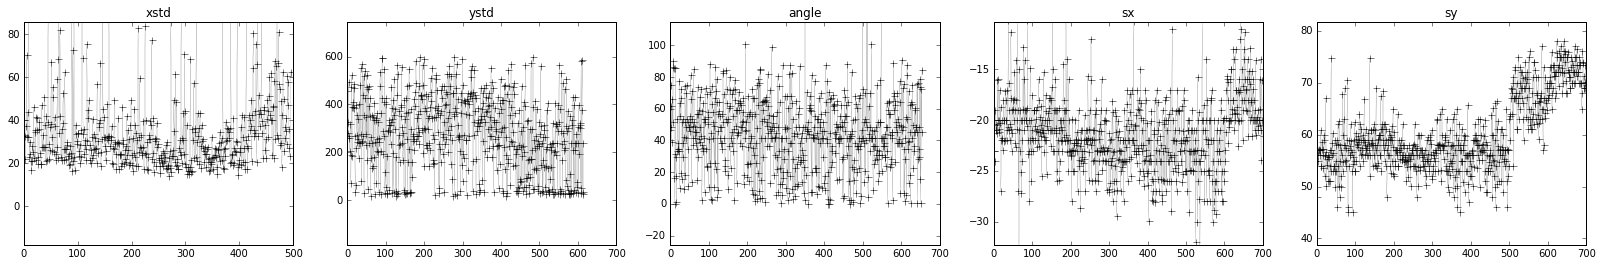

In [236]:
fig = plt.figure(figsize=(28,4))
titles = 'xstd','ystd','angle','sx', 'sy'
bounds = [0,100], [0,600], [0,180], [-100,100],[-100,100]
for i,j in enumerate(np.array(paras).T):
    valid = [(j>bounds[i][0])&(j<bounds[i][1])]
    data = j[valid]
    print np.sum(data*w[valid])
    ax = plt.subplot(1,5,i+1)
    ax.plot(data, 'k-+', linewidth=0.1, markersize=7)
    plt.title(titles[i])
    plt.ylim(data.mean()-3*data.std(),data.mean()+3*data.std())

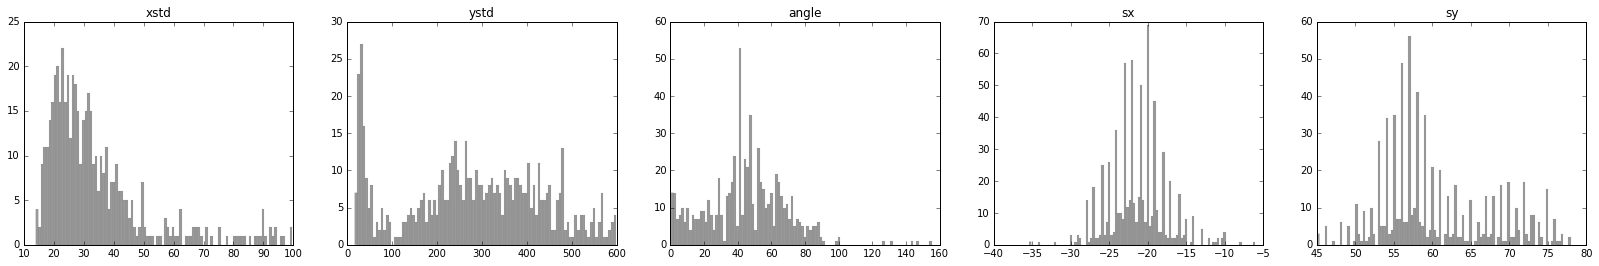

In [239]:
fig = plt.figure(figsize=(28,4))
titles = 'xstd','ystd','angle','sx', 'sy'
for i,j in enumerate(np.array(paras).T):
    valid = [(j>bounds[i][0])&(j<bounds[i][1])]
    data = j[valid]
    ax = plt.subplot(1,5,i+1)
    hist = ax.hist(data,bins=100, linewidth=0.05, color='gray', alpha=0.8)
    plt.title(titles[i])
    #print data[data<data.mean()+3*data.std()].mean()
    #plt.ylim(j.mean()-3*j.std(),j.mean()+3*j.std())

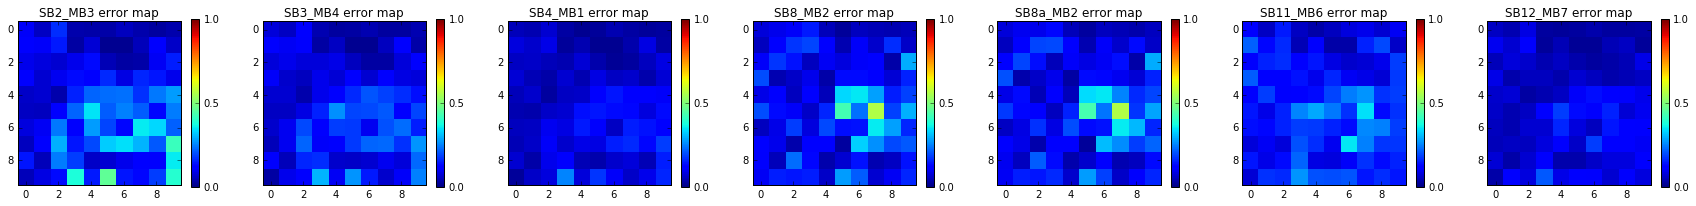

In [270]:
fig = plt.figure(figsize=(30,3))
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8A_MB2,SB11_MB6,SB12_MB7').split(',')
for ii,i in enumerate(np.array(costs).reshape(7,100,3)):
    data = np.zeros((10,10))
    data[(i[:,0]).astype('int'), i[:,1].astype('int')] = i[:,2]
    ax = plt.subplot(1,7,ii+1)
    cx = ax.imshow(data, interpolation ='Nearest', vmin=0, vmax=1.)
    fig.colorbar(cx,ticks=[0.,0.5,1.])
    ax.set_title('%s error map'%(names[ii]))

In [274]:
whlb4 = parallel_rw_pkl(None, 'whsolb4_modis', 'r')

In [33]:
data = []
for i in ['whsolb2_modis', 'whsolb3_modis','whsolb4_modis','whsolb8_modis','whsolb8a_modis','whsolb11_modis','whsolb12_modis']:
    data.append(parallel_rw_pkl(None, i, 'r'))

In [34]:
paras=[]
costs=[]
for ii in data:
    for i in ii:
        paras.append(i[0])
        costs.append(i[1])

In [39]:
paras = np.array(paras).reshape(7,29,5)

In [40]:
costs = np.array(costs).reshape((7,29))

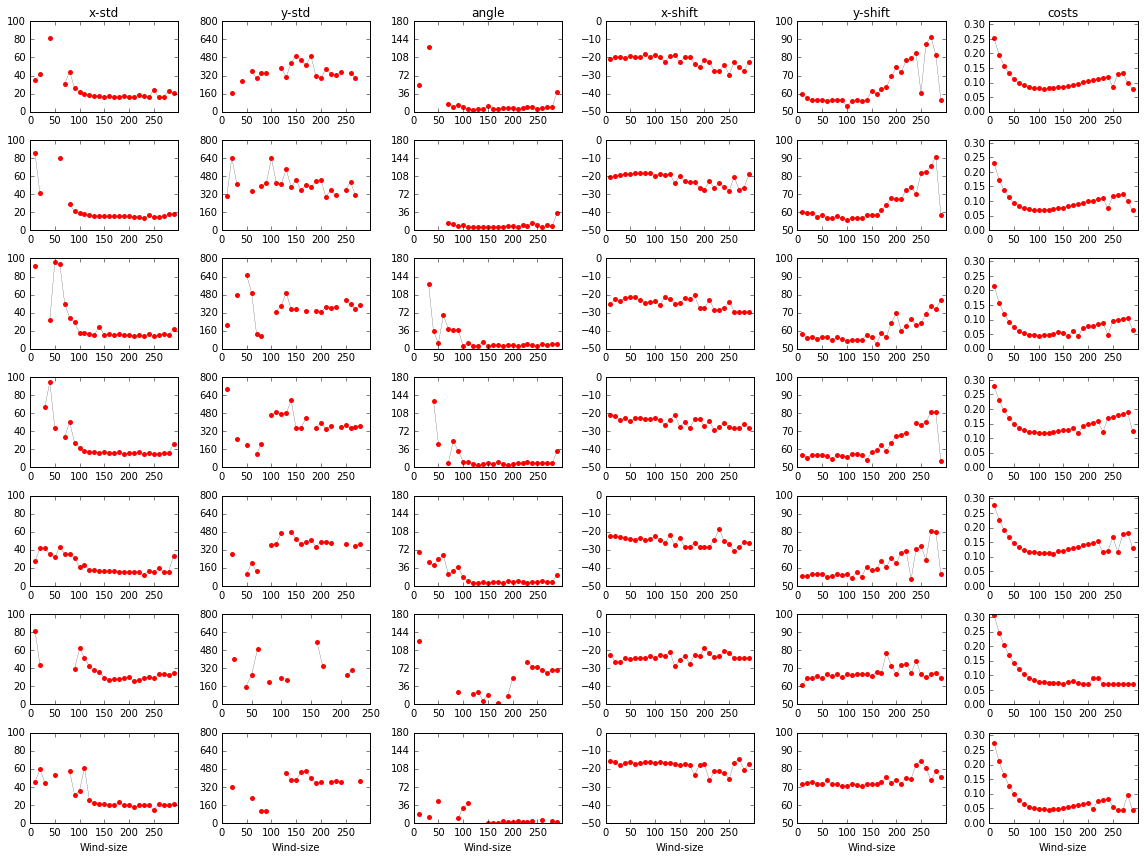

In [30]:
titles = 'x-std','y-std','angle','x-shift', 'y-shift', 'costs'
fig = plt.figure(figsize=(16,12))
for ii, para in enumerate(paras):   
    for i in range(6):
        if i ==3:
            ax = fig.add_subplot(7,6,6*ii+i+1)
            ax.plot(range(10,300, 10),np.array(para).T[i],color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(-50,0)
            if ii ==0:
                ax.set_title(titles[i])
            if ii == 6:
                ax.set_xlabel('Wind-size')
            ax.set_xticks(range(0,300, 50))
        elif i==1:
            ax = fig.add_subplot(7,6,6*ii+i+1)
            ax.plot(range(10,300, 10),np.array(para).T[i],color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(0,800)
            if ii ==0:
                ax.set_title(titles[i])
            if ii == 6:
                ax.set_xlabel('Wind-size')
            ax.set_xticks(range(0,300, 50))
            ax.set_yticks(range(0,801, 160))
        elif i==0:
            ax = fig.add_subplot(7,6,6*ii+i+1)
            ax.plot(range(10,300, 10),np.array(para).T[i],color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(0,100)
            if ii ==0:
                ax.set_title(titles[i])
            if ii == 6:
                ax.set_xlabel('Wind-size')
            ax.set_xticks(range(0,300, 50))
        elif i==2:
            ax = fig.add_subplot(7,6,6*ii+i+1)
            ax.plot(range(10,300, 10),np.array(para).T[i],color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(0,180)
            if ii ==0:
                ax.set_title(titles[i])
            if ii == 6:
                ax.set_xlabel('Wind-size')
            ax.set_xticks(range(0,300, 50))
            ax.set_yticks(range(0,181, 36))
        elif i ==5:
            ax = fig.add_subplot(7,6,6*ii+i+1)
            ax.plot(range(10,300, 10),costs[ii] ,color='k', marker='o', 
                     linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            if ii ==0:
                ax.set_title(titles[i])
            if ii == 6:
                ax.set_xlabel('Wind-size')
            ax.set_xticks(range(0,300, 50))
            ax.set_ylim(0,0.31)
        elif i ==4:
            ax = fig.add_subplot(7,6,6*ii+i+1)
            ax.plot(range(10,300, 10),np.array(para).T[i],color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(50,100)
            if ii ==0:
                ax.set_title(titles[i])
            if ii == 6:
                ax.set_xlabel('Wind-size')
            ax.set_xticks(range(0,300, 50))
        else:
            ax = fig.add_subplot(7,6,6*ii+i+1)
            ax.plot(range(10,300, 10),np.array(para).T[i] ,color='k', marker='o', 
                     linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            if ii ==0:
                ax.set_title(titles[i])
            if ii == 6:
                ax.set_xlabel('Wind-size')
            ax.set_xticks(range(0,300, 50))
    plt.tight_layout()
plt.tight_layout()

23.9744718775
306.15258185
7.91598096945
-21.5616564408
59.7537708998


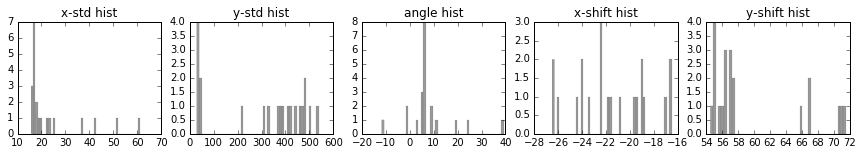

In [24]:
%matplotlib inline
fig = plt.figure(figsize=(18,2))
bounds = [[0,100],[200,800], [0,180], [-50,0], [50,100]]
titles = 'x-std','y-std','angle','x-shift', 'y-shift', 'costs'
for ii in range(5):
    ax = fig.add_subplot(1,6,ii+1)
    data = []
    for i,j in enumerate(paras):
        data.append(j[10:13])
        #hist = ax.hist(j[7:13], bins=50, linewidth=0.1, color='gray', alpha=0.8)
    ax.hist(np.array(data).reshape(21,5).T[ii], bins=50, linewidth=0.1, color='gray', alpha=0.8)
    ax.set_title(titles[ii]+' hist')
    print np.array(data).reshape(21,5).T[ii].mean()

In [26]:
paras.shape

(7, 29, 5)

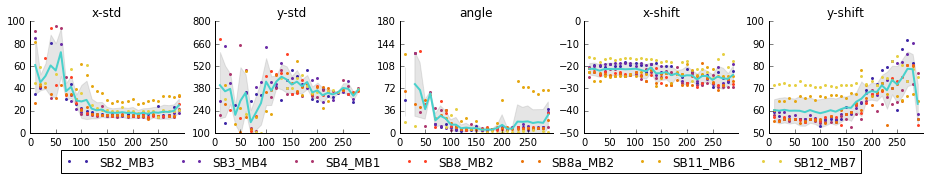

In [29]:
fig = plt.figure(figsize=(16,2))
titles = 'x-std','y-std','angle','x-shift', 'y-shift', 'costs'
labels = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')
bounds = [[0,100],[100,800], [0,180], [-50,0], [50,100]]
cmap = plt.get_cmap('CMRmap')
cmaps = [cmap((i+2)*(1./10.)) for i in range(7)]
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
    data=[]
    ls=[]
    for j in range(7):
        m = (paras[j,:,i]>bounds[i][0])&(paras[j,:,i]<bounds[i][1])
        l, = ax.plot((np.arange(10,300, 10))[m], paras[j,:,i][m], 'o', mew=0,
                     color = cmaps[j], linewidth=0.1, markersize=3)
        ls.append(l)
        paras[j,:,i][~m]=np.nan
        data.append(paras[j,:,i])
    mean = np.nanmean(np.array(data),axis=0)
    std = np.nanstd(np.array(data),axis=0)
    ax.plot(np.arange(10,300, 10), mean, '-',color= 'mediumturquoise', linewidth=2)
    ax.fill_between(np.arange(10,300, 10), mean-std, mean+std, alpha=0.2, color='gray')
    ax.set_title(titles[i])
    ax.set_xticks(range(0,300, 50))
    ax.set_ylim(bounds[i])
    ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
plt.legend(ls, labels, loc=9, bbox_to_anchor=(-2, -0.1), ncol=7)

In [2]:
fhead = 'data/50SMG20165100'

def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus, ygaus)
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2: center[0]+xwin/2, center[1]-ywin/2:center[1]+ywin/2]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

def applied(p,winsize):    
    xstd,ystd,angle, xs, ys = p
    xwin,ywin = winsize, winsize
    print 'window size: ',winsize 
    to_regression =[]          
    
    
    cx = centers[0]
    cy = centers[1]
    
    
    gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                              
    ker = gaus/(gaus.sum())

    s = signal.fftconvolve(sent, ker, mode='same')
    
    vld_x = ((cx+xs)>50)&((cx+xs)<9950)
    vld_y = ((cy+ys)>50)&((cy+ys)<9950)
    vld = vld_x&vld_y
    
    brdf = modis_sent[cx[vld],cy[vld]]*0.001
    indx,indy = np.round((cx+xs)[vld]).astype(int), np.round((cy+ys)[vld]).astype(int)
    vals = s[indx,indy]
    to_regression.append([vals, brdf])

    return to_regression

def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

centers = parallel_rw_pkl(None, 'Sindex', 'r')

cm = parallel_rw_pkl(None, 'newcloudm', 'r')
p = 23.9744718775, 306.15258185, 7.91598096945, -21.5616564408, 59.7537708998

fnames = ['corband2.tif','corband3.tif', 'corband4.tif', 'corband8.tif', 'corband8a.tif', 'B11', 'B12']
bands = 'b2','b3', 'b4', 'b8', 'b8a', 'b11', 'b12'
for i in range(7):
    if i<4:
        data = parallel_rw_pkl(None, 'inter_sent%i'%i, 'r')
        mask = parallel_rw_pkl(None, 'inter_sentm%i'%i, 'r')
        data[mask] = np.nan
        modis_sent = np.array(data)
    if i>=4:
        data = parallel_rw_pkl(None, 'inter_sent%i'%(i-1), 'r')
        mask = parallel_rw_pkl(None, 'inter_sentm%i'%(i-1), 'r')
        data[mask] = np.nan
        modis_sent = np.array(data)
    
    if i<5:
        sent = tiff.imread(fnames[i], key=0)
    elif i==5:
        sent = readfile([11,],fhead)[fnames[i]]
    elif i==6:
        sent = readfile([12,],fhead)[fnames[i]]
    else:
        pass
    print 'finshed reading data', fnames[i]
    
    sent = ScaleExtent(sent, (10980,10980))
    sent[cm] = sent[~cm].mean()
    regs = applied(p, 100)
    parallel_rw_pkl(np.array(regs).T, 'app_%smodis'%bands[i], 'w')
    print 'finished %s'%bands[i]

finshed reading data corband2.tif
window size:  100
finished b2
finshed reading data corband3.tif
window size:  100
finished b3
finshed reading data corband4.tif
window size:  100
finished b4
finshed reading data corband8.tif
window size:  100
finished b8
finshed reading data corband8a.tif
window size:  100
finished b8a
data/50SMG20165100auxiliaryECMWFT
data/50SMG20165100metadata.xml
finshed reading data B11
window size:  100
finished b11
data/50SMG20165100auxiliaryECMWFT
data/50SMG20165100metadata.xml
finshed reading data B12
window size:  100
finished b12


In [21]:
b4_modis = parallel_rw_pkl(None, 'app_b4modis', 'r')
b2_modis = parallel_rw_pkl(None, 'app_b2modis', 'r')
b3_modis = parallel_rw_pkl(None, 'app_b3modis', 'r')
b8_modis = parallel_rw_pkl(None, 'app_b8modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'app_b8amodis', 'r')
b11_modis = parallel_rw_pkl(None, 'app_b11modis', 'r')
b12_modis = parallel_rw_pkl(None, 'app_b12modis', 'r')

In [22]:
bands = [i.reshape(45607,2) for i in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]]

#### Validation

In [761]:
band10m = glob.glob('L2Adata/R10m/*B0*')
band20m = glob.glob('L2Adata/R20m/*B1*')
files = band10m + band20m
files.insert(4,band20m[0][:-11]+'B8A_20m.jp2')
files

['L2Adata/R10m/S2A_USER_MSI_L2A_TL_SGS__20160510T081203_A004605_T50SMG_B02_10m.jp2',
 'L2Adata/R10m/S2A_USER_MSI_L2A_TL_SGS__20160510T081203_A004605_T50SMG_B03_10m.jp2',
 'L2Adata/R10m/S2A_USER_MSI_L2A_TL_SGS__20160510T081203_A004605_T50SMG_B04_10m.jp2',
 'L2Adata/R10m/S2A_USER_MSI_L2A_TL_SGS__20160510T081203_A004605_T50SMG_B08_10m.jp2',
 'L2Adata/R20m/S2A_USER_MSI_L2A_TL_SGS__20160510T081203_A004605_T50SMG_B8A_20m.jp2',
 'L2Adata/R20m/S2A_USER_MSI_L2A_TL_SGS__20160510T081203_A004605_T50SMG_B11_20m.jp2',
 'L2Adata/R20m/S2A_USER_MSI_L2A_TL_SGS__20160510T081203_A004605_T50SMG_B12_20m.jp2']

In [ ]:
fhead = 'data/50SMG20165100'

def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus, ygaus)
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2: center[0]+xwin/2, center[1]-ywin/2:center[1]+ywin/2]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

def applied(p,winsize):    
    xstd,ystd,angle, xs, ys = p
    xwin,ywin = winsize, winsize
    print 'window size: ',winsize 
    to_regression =[]          
    
    
    cx = centers[0]
    cy = centers[1]
    
    
    gaus = gaussian(xwin,ywin,xstd,ystd,angle,False)                              
    ker = gaus/(gaus.sum())

    s1 = signal.fftconvolve(L1C_sent, ker, mode='same')
    s2 = signal.fftconvolve(L2A_sent, ker, mode='same')
    s1[dia_cm]=np.nan
    s2[dia_cm]=np.nan
    
    vld_x = ((cx+xs)>50)&((cx+xs)<9950)
    vld_y = ((cy+ys)>50)&((cy+ys)<9950)
    vld = vld_x&vld_y
    
    brdf = modis_sent[cx[vld],cy[vld]]*0.001
    indx,indy = np.round((cx+xs)[vld]).astype(int), np.round((cy+ys)[vld]).astype(int)
    vals1 = s1[indx,indy]
    vals2 = s1[indx,indy]
    
    to_regression.append([vals1,vals2, brdf])

    return to_regression

def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

centers = parallel_rw_pkl(None, 'Sindex', 'r')

cm = parallel_rw_pkl(None, 'newcloudm', 'r')
struct1 = ndimage.generate_binary_structure(2, 1)
dia_cm = bd(cm, structure=struct1, iterations=2).astype(a.dtype)

p = 23.9744718775, 306.15258185, 7.91598096945, -21.5616564408, 59.7537708998

fnames = ['corband2.tif','corband3.tif', 'corband4.tif', 'corband8.tif', 'corband8a.tif', 'B11', 'B12']
bands = 'b2','b3', 'b4', 'b8', 'b8a', 'b11', 'b12'
for i in range(7):
    
    l2a = gdal.Open(files[i]).ReadAsArray()
    L2A_sent = ScaleExtent(l2a, (10980,10980))
    L2A_sent[cm] = L2A_sent[~cm].mean()
    if i<4:
        data = parallel_rw_pkl(None, 'inter_sent%i'%i, 'r')
        mask = parallel_rw_pkl(None, 'inter_sentm%i'%i, 'r')
        data[mask] = np.nan
        modis_sent = np.array(data)
    else:
        data = parallel_rw_pkl(None, 'inter_sent%i'%(i-1), 'r')
        mask = parallel_rw_pkl(None, 'inter_sentm%i'%(i-1), 'r')
        data[mask] = np.nan
        modis_sent = np.array(data)
    
    if i<5:
        L1C_sent = tiff.imread(fnames[i], key=0) 
    elif i==5:
        L1C_sent = readfile([11,],fhead)[fnames[i]]
    elif i==6:
        L1C_sent = readfile([12,],fhead)[fnames[i]]
    else:
        pass
    print 'finshed reading data', fnames[i]
    
    L1C_sent = ScaleExtent(sent, (10980,10980))
    L1C_sent[cm] = L1C_sent[~cm].mean()
    regs = applied(p, 100)
    parallel_rw_pkl(np.array(regs).T, 'vali_%smodis'%bands[i], 'w')
    print 'finished %s'%bands[i]

In [807]:
b4_modis = parallel_rw_pkl(None, 'vali_b4modis', 'r')
b2_modis = parallel_rw_pkl(None, 'vali_b2modis', 'r')
b3_modis = parallel_rw_pkl(None, 'vali_b3modis', 'r')
b8_modis = parallel_rw_pkl(None, 'vali_b8modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'vali_b8amodis', 'r')
b11_modis = parallel_rw_pkl(None, 'vali_b11modis', 'r')
b12_modis = parallel_rw_pkl(None, 'vali_b12modis', 'r')

In [808]:
bands = [i.reshape(45607,3) for i in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]]

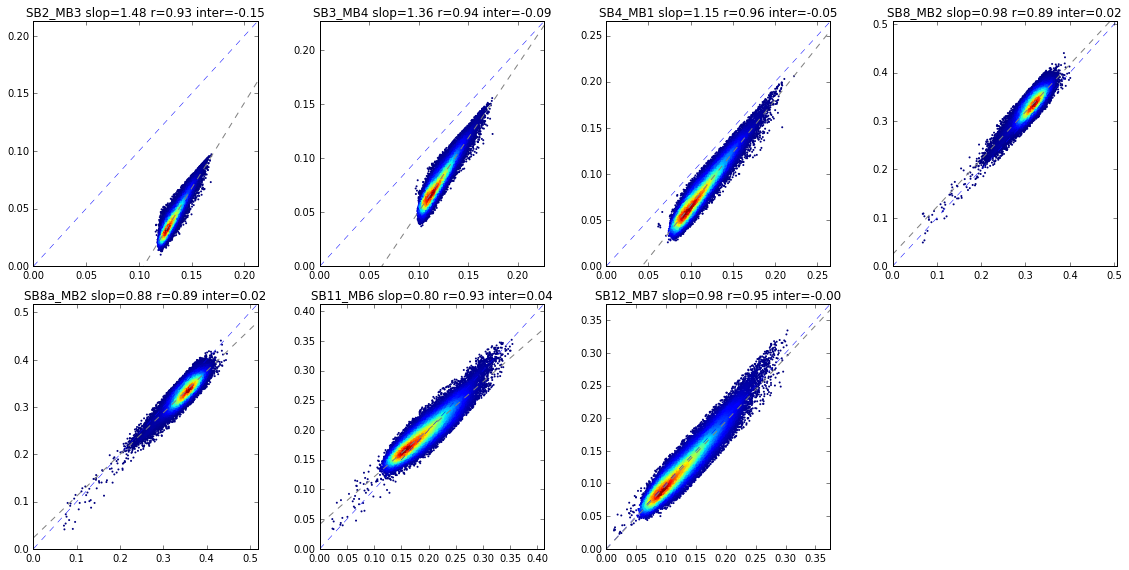

In [820]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')
for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    data[:,1] = data[:,1]*0.0001
    maxval = np.nanmax(data)
    mask = ~(np.isnan(data[:,0])|np.isnan(data[:,2]))
    
    m = (data[:,0])[mask]
    s = (data[:,2])[mask]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

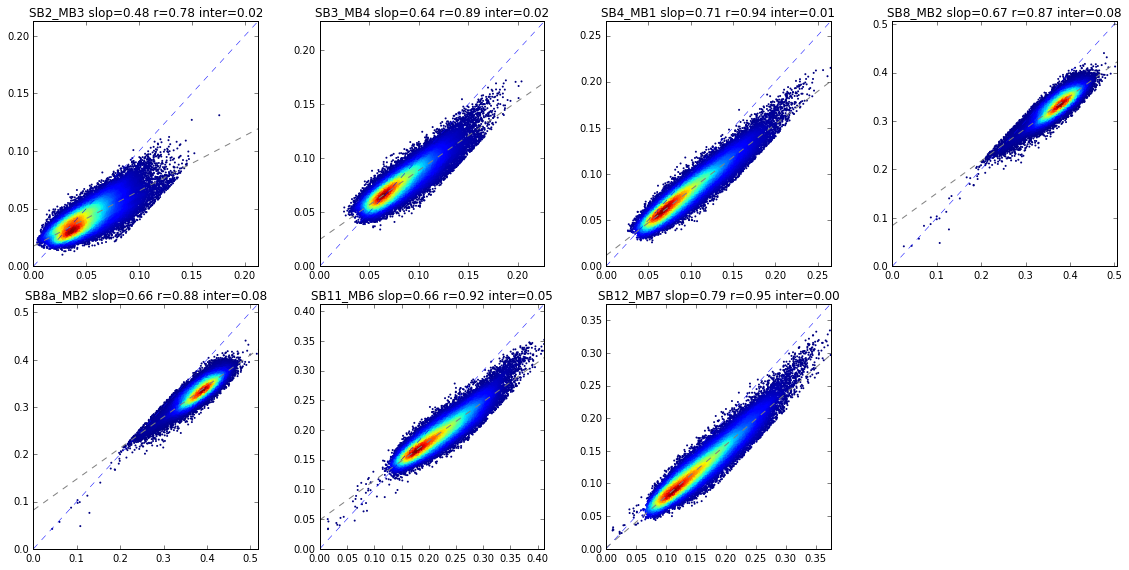

In [823]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')
for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    data[:,1] = data[:,1]*0.0001
    maxval = np.nanmax(data)
    mask = ~(np.isnan(data[:,1])|np.isnan(data[:,2]))
    
    m = (data[:,1])[mask]
    s = (data[:,2])[mask]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

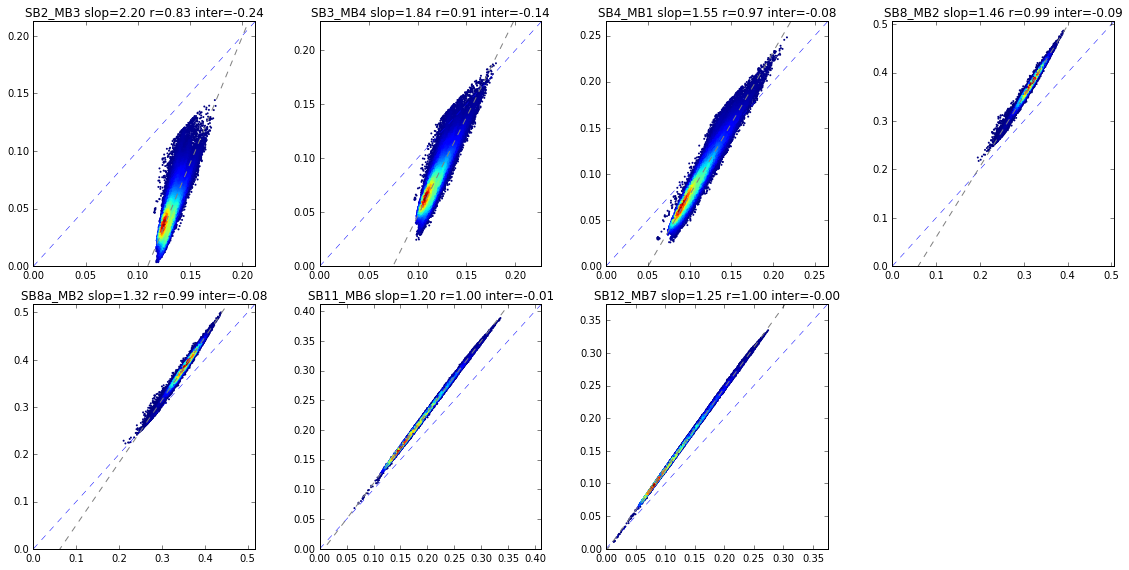

In [824]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')
for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    data[:,1] = data[:,1]*0.0001
    maxval = np.nanmax(data)
    mask = ~(np.isnan(data[:,0])|np.isnan(data[:,1]))
    
    m = (data[:,0])[mask]
    s = (data[:,1])[mask]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()

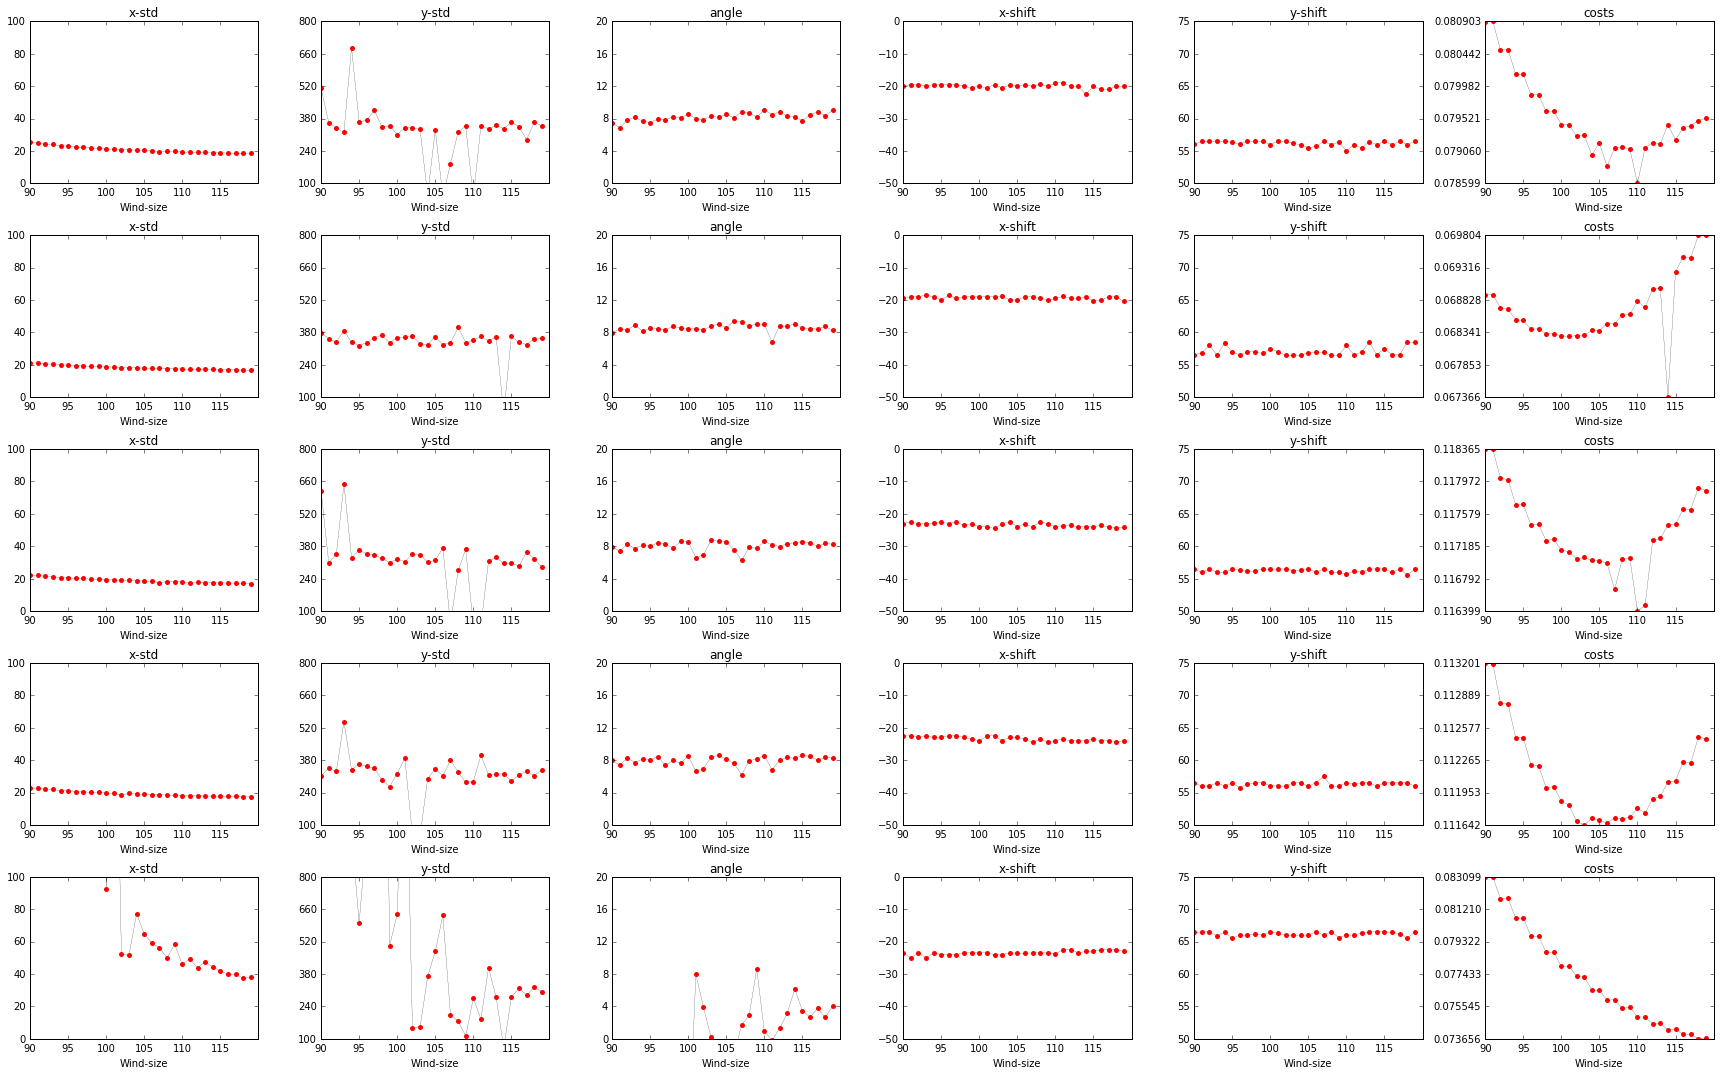

In [945]:
sps = 5
fig = plt.figure(figsize=(24,15))
titles = 'x-std','y-std','angle','x-shift', 'y-shift', 'costs'
x_tick = range(90,120, 5)
x_ax = range(90,120,1)

for ii, fname in enumerate(['swhsolb2_modis','swhsolb3_modis','swhsolb8_modis','swhsolb8a_modis', 'swhsolb11_modis']):
    
    data = parallel_rw_pkl(None,fname , 'r')
    paras=[]
    costs=[]
    for iii in data:
        paras.append(iii[0])
        costs.append(iii[1])
    paras = np.array(paras)
    bounds = [[0,100],[100,800], [0,20], [-50,0], [50,75],[min(costs), max(costs)]]
    for i,j in enumerate(paras.T):
        if i ==3:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i==1:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i==0:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i==2:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
        elif i ==4:
            ax = fig.add_subplot(sps,6,ii*6+i+1)
            ax.plot(x_ax,j,color='k', 
                          marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0 )
            ax.set_ylim(bounds[i][0],bounds[i][1])
            ax.set_title(titles[i])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.arange(bounds[i][0],bounds[i][1]+1, (bounds[i][1]-bounds[i][0])/5.))
            ax = fig.add_subplot(sps,6,ii*6+i+2)
            ax.plot(x_ax,costs,color='k', 
                              marker='o', linewidth=0.2,markerfacecolor='r', markersize= 5,mew=0)
            ax.set_ylim(bounds[i+1][0],bounds[i+1][1])
            ax.set_title(titles[i+1])
            ax.set_xlabel('Wind-size')
            ax.set_xticks(x_tick)
            ax.set_yticks(np.linspace(bounds[i+1][0],bounds[i+1][1], num=6))
    plt.tight_layout()

In [946]:
ax.scatter?